# AllLife Credit Card Customer Segmentation

## Background
AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the back poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective
To identify  different  segments  in  the  existing  customer  based  on  their spending patterns as well as past interaction with the bank.

## Key Questions
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?

## Data Description
- Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which  customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre. 

## Steps to follow

1. Perform  univariate  analysis  on  the  data  to  better  understand  the  variables  at  your disposal  and  to  get  an  idea  about  the  no  of  clusters. Perform  EDA,  createvisualizations to explore data. (10 marks)
2. Properly  comment  on  the  codes, provide  explanations  of  the  steps  taken  in  the notebookand conclude your insights from the graphs. (5marks)
3. Execute K-meansclustering use  elbow  plot and  analyse  clusters  using  boxplot(10marks)
4. Execute hierarchicalclustering(with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot(15marks)
5. Calculate average silhouette score for both methods. (5marks)
6. Compare K-means clusters with Hierarchical clusters. (5marks)
7. Analysis  the  clusters  formed,  tell  us  how  is  one  cluster  different  from  another and answer all the key questions. (10marks)

# 00. Import Data and Packages

In [120]:


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split

# K-MEANS
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Hierarchial Clustering
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler


#import sklearn.metrics

## PCA


from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

data = pd.read_excel("Credit Card Customer Data.xlsx")


# 01. EDA

In [2]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
data.shape

(660, 7)

In [4]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [58]:
data_si=data.iloc[:,2:]
data_scl=data_si.apply(zscore)

# data sans ids
# data sans ids + scaled
# removing Sl_No and Customer Key columns 
# leaving only significant data (for now)

In [63]:
data_si.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [64]:
data_scl.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [59]:
data_si.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [62]:
data_scl.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.612639e-17,4.306320e-17,-4.306320e-17,7.536059e-17,-8.612639e-17
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


In [9]:
data_si.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [10]:
data_scl.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

### i. Insights:
- Rather small dataset
- Si_No was not necessary
- Will need to scale Avg_Credit_Limit
- No null values
- Skewness/Distribution:
    - Avg_Credit_Limit and Total_visits_online are positively skewed; mean > median. 
    - All other columns seem to have near symmetrical distribution/zero skewness; mean = median.   
- Max credit limit is $200,000! (The cost of a humble house, essentially)
- Looking at both data_si (not scaled) and data_scl (scaled), it's curious how it was scaled. 

<AxesSubplot:>

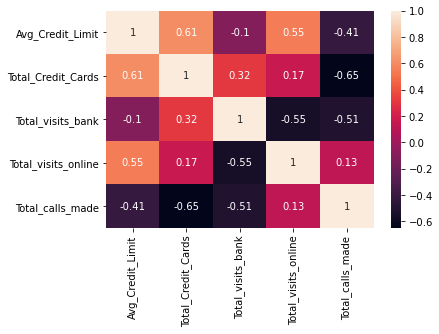

In [11]:
sns.heatmap(data_si.corr(), annot = True)

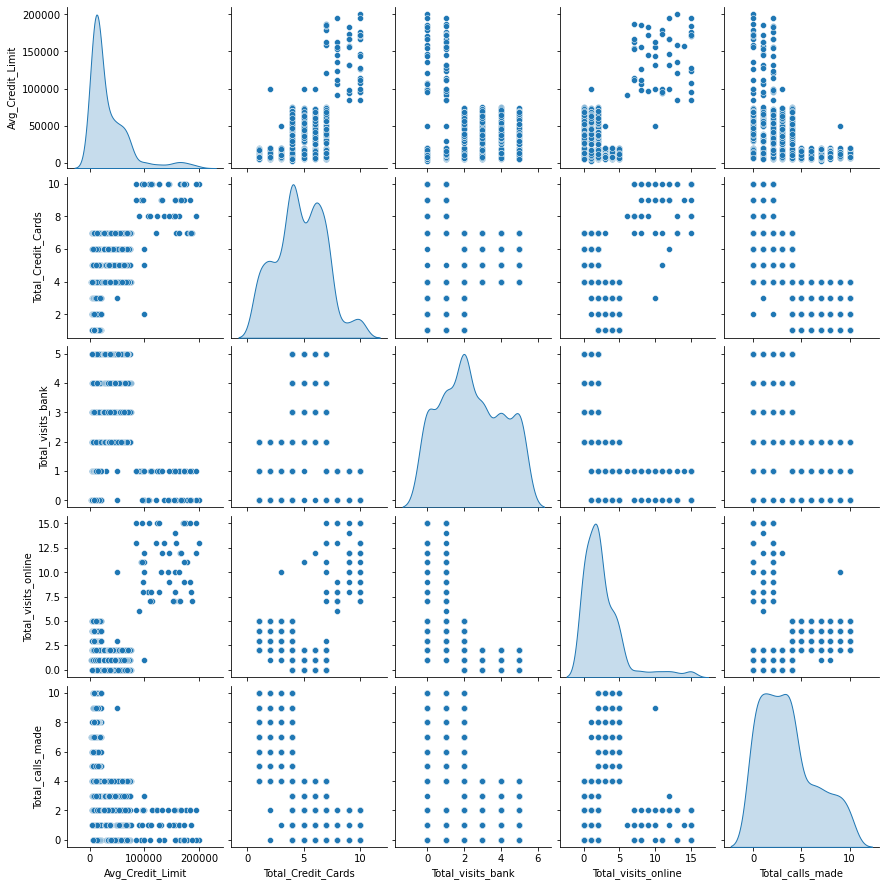

In [12]:
sns.pairplot(data_si, diag_kind='kde') 

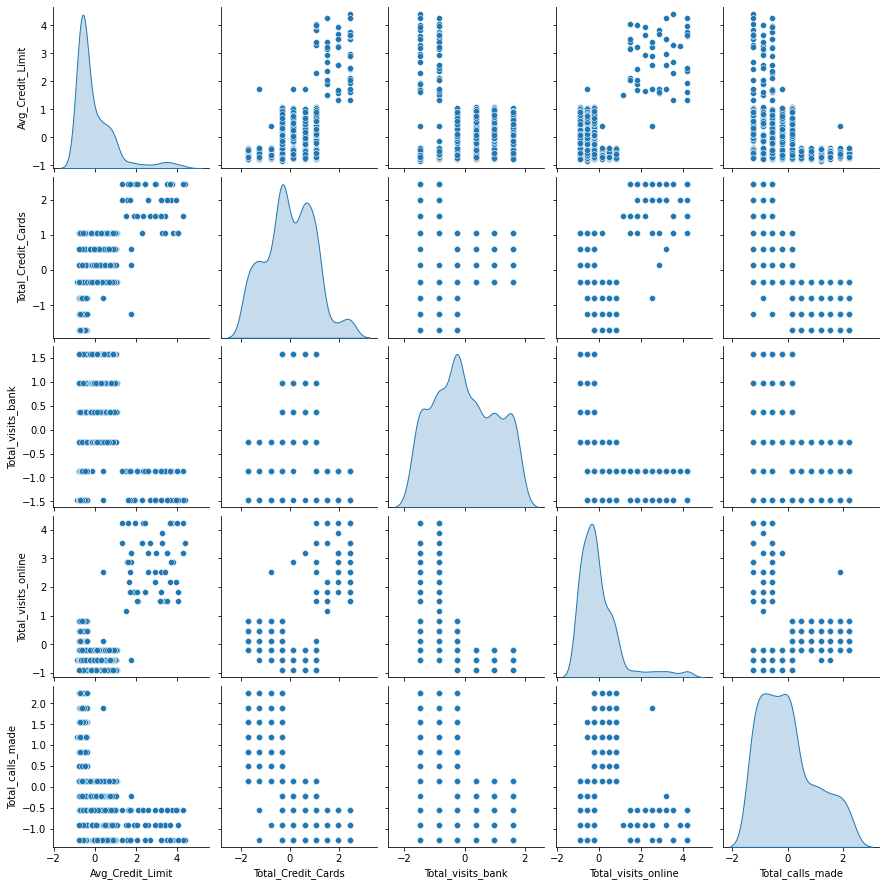

In [13]:
sns.pairplot(data_scl, diag_kind='kde') 

### i. Insights:
- Looks like we can work with 3 to 5 clusters.
- Positive correlation between Total_Credit_Card and Avg_Credit_Limit
    - This is to be expeected as you can't have one without the other.
- Also a positive correlation between Total_visits_online and Avg_Credit_Limit
    - This relationship seems much more interesting. 
    - Seems to point to the idea that customers with a credit card seem enjoy shopping online. 
- Most seem to have a negative correlation, which makes sense considering the insight from  the market research team that, ___"the  customers perceive the support services of the back poorly."___
- Also curious how the pair plots would look between the scaled and non-scaled dataset

# 02. K-Means Clustering
## 02a. Elbow Plot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

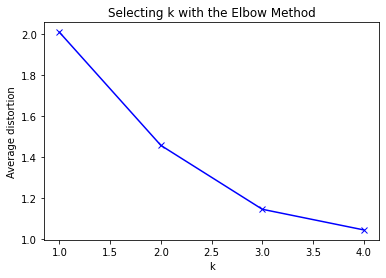

In [65]:
clusters=range(1,5) # selecting 1-5 based on observations listed above
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scl)
    prediction=model.predict(data_scl)
    meanDistortions.append(sum(np.min(cdist(data_scl, model.cluster_centers_, 'euclidean'), axis=1)) / data_scl.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


### i. Insights
- There is a clear elbow at k=3, confirming the previous suspicion of 3-5 clusters. 

## 02b. Analyze Clusters Using Boxplot

In [66]:
final_model=KMeans(3) # k=3 as there is an elbow at 3
final_model.fit(data_scl)
prediction=final_model.predict(data_scl)

data_clst= data_scl.copy() # data with clusters
data_clst["Cluster"] = prediction # append the prediction as column
data_clst.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0


In [67]:
data_clst.groupby(['Cluster']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,2.831764,1.862226,-1.105763,2.827319,-0.874330
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,-0.595796,-1.059623,-0.901518,0.322997,1.148109


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[Cluster]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[Cluster]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[Cluster]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

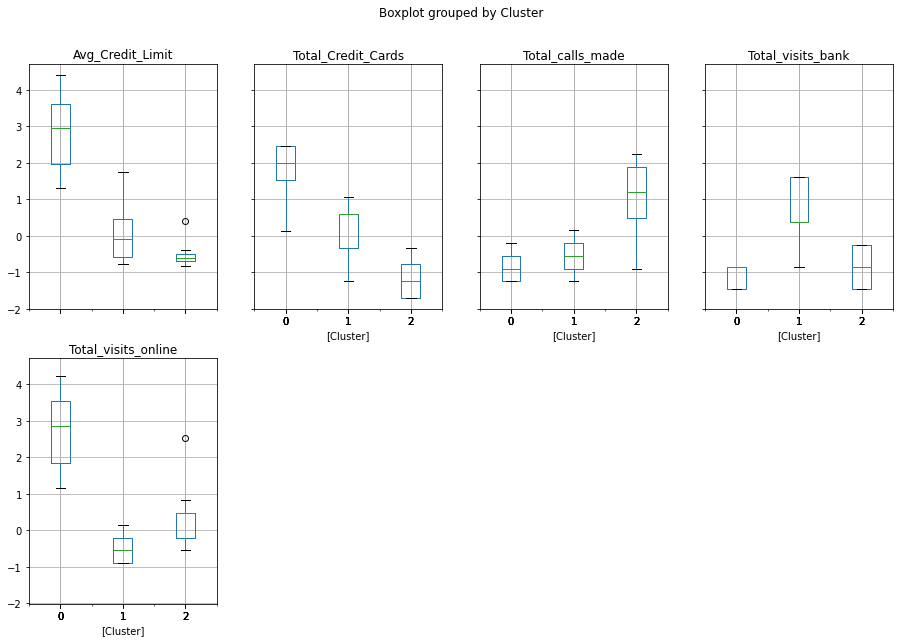

In [68]:
data_clst.boxplot(by='Cluster', layout = (2,4),figsize=(15,10))

# 03. Hierarchical Clustering (with different linkages)

## 03a. Average

In [112]:
sc = StandardScaler()
data_ss = pd.DataFrame(sc.fit_transform(data_si),columns=data_si.columns)
# data standard scaler
data_ss.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [163]:
model_avg = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [164]:
model_avg.fit(data_scl)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [165]:
data_avg = data_scl.copy()
data_avg['Labels'] = model_avg.labels_
data_avg.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


In [166]:
data_avg.groupby(['Labels']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Labels,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200
1,2.831764,1.862226,-1.105763,2.827319,-0.874330
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605


### 03a.01. Cophenetic Coeff

In [167]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_avg = linkage(data_scl, metric='euclidean', method='average')
c_avg, coph_dists_avg = cophenet(Z_avg , pdist(data_scl))

c_avg

0.8977080867389372

### 03a.02. Dendrogram

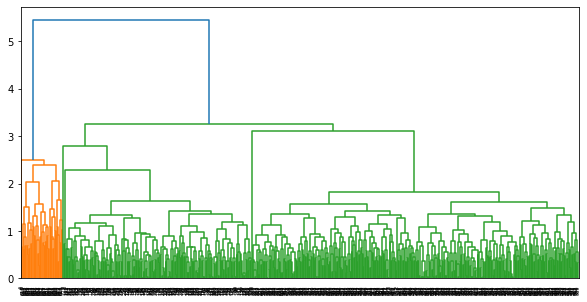

In [168]:
plt.figure(figsize=(10, 5))
dendrogram(Z_avg)
plt.show()

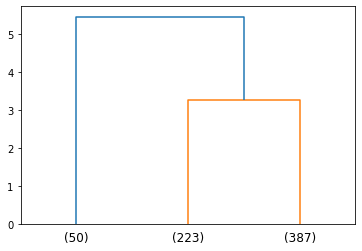

In [170]:
dendrogram(
    Z_avg,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### i. Insights
- 3 groups:
    1. 50 customers
    1. 223 customers
    1. 387 customers

## 03b. Complete

In [171]:
model_comp = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
model_comp.fit(data_scl)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [172]:
data_comp = data_scl.copy()
data_comp['Labels'] = model_comp.labels_
data_comp.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


### 03b.01. Cophenetic Coeff

In [173]:
Z_comp = linkage(data_scl, metric='euclidean', method='complete')
c_comp, coph_dists_comp = cophenet(Z_comp , pdist(data_scl))

c_comp

0.8599730607972423

### 03b.02. Dendrogram

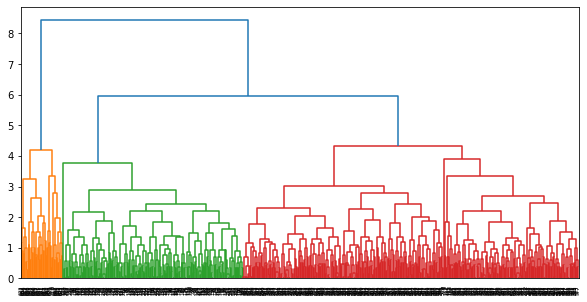

In [174]:
plt.figure(figsize=(10, 5))
dendrogram(Z_comp)
plt.show()

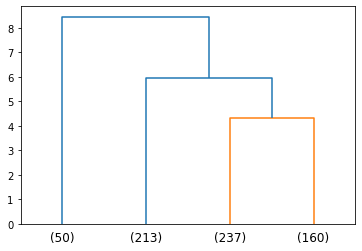

In [176]:
dendrogram(
    Z_comp,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

### i. Insights
- 4 groups:
    1. 50 customers
    1. 213 customers
    1. 237 customers
    1. 160 customers
- Differs significantly from Average

## 03c. Ward

In [177]:
model_ward = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model_ward.fit(data_ss)

AgglomerativeClustering(n_clusters=4)

In [178]:
data_ward = data_ss.copy()
data_ward['Labels'] = model_ward.labels_
data_ward.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


### 03c.01. Cophenetic Coeff

In [179]:
Z_ward = linkage(data_ss, metric='euclidean', method='ward')
c_ward, coph_dists_ward = cophenet(Z_ward, pdist(data_ss))

c_ward

0.7415156284827493

### 03c.02. Dendrogram

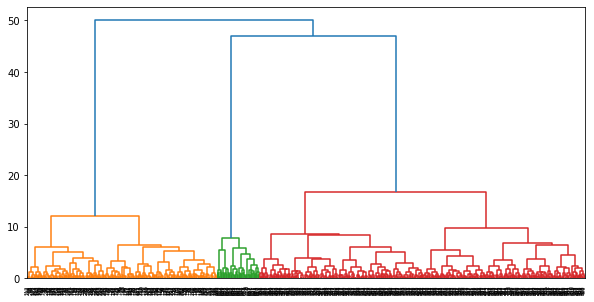

In [180]:
plt.figure(figsize=(10, 5))
dendrogram(Z_ward)
plt.show()

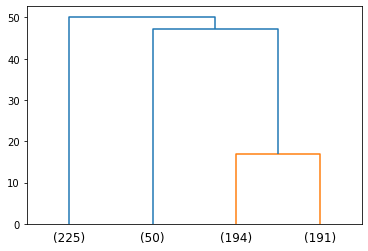

In [181]:
dendrogram(
    Z_ward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

### i. Insights
- 4 groups:
    1. 225 customers
    1. 50 customers
    1. 194 customers
    1. 191 customers
- Nearly identical in values to Average and Complete; different order than the other two. 

# 04. Silhouette Score

## 04a. Hierarchical Clustering

In [151]:
clusters_ward = fcluster(Z_ward, 50, criterion='distance')
clusters_ward

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [152]:
silhouette_score(data_ss,clusters_ward)

0.417704147620949

# 05. K-means Clusters VS Hierarchical Clusters

Both were had some similarities in that the clusters were both around 3 or 4. 

# 06. Final Questions

## 06a. How is one cluster different from another?

One seemed to strongly suggest there were 3 groups (elbow method), however, the other hinted that there was a 4th cluster. 

## 06b. How many different segments of customers are there?

There are 3 primary segments of customers, with the possibility of splitting the 3rd into 2. 

## 06d. How are these segments different from each other?

1. Customers in the 1st group seem to be the big spenders: they have the highest credit card limit, they have more credit cards, and they use their cards online. 
1. On the other hand, customers at the opposite end of 1 seem to have few credit cards, they have lower limites, and they don't shop online as much. 
1. The third group of customers have an average amount credit cards and credit limit, hoever, while they rarely shop online but have the most in-person visits to the bank. 

## 06e. What are your recommendations to the bank on how to better market to and service these customers?

To get the biggest return on investment, I would suggest targetting online shoppers and improving the online experience. This will target the first group, of course, but it will also help with the second group as they seem to have the most calls. The first group can only benefit as in-store representative can direct the in-person customers to the website. Providing a complete customer experience online will benefit all three segments. 